# **What Are The Effects Of Age on COVID-19 Rates ?**
#### Fall 2024 Data Science Project
#### Vishaal Saravanan, Pacawat Luu, Nobukazu Sawai

Contributions:

- Vishaal Saravanan, Pacawat Luu, Nobukazu Sawai: Project idea
- Pacawat Luu: Dataset Curation and Preprocessing
- Vishaal Saravanan, Pacawat Luu, Nobukazu Sawai: Data Exploration and Summary
Statistics
- Pacawat Luu, Nobukazu Sawai: ML Algorithm Design/Development
- Pacawat Luu, Nobukazu Sawai: ML Algorithm Training and Test Data Analysis
- Vishaal Saravanan: Visualization, Result Analysis, Conclusion
- Vishaal Saravanan: Final Tutorial Report Creation

# **1. Introduction**
In March of 2019, everything in the world suddenly came to a halt. Schools closed, companies sent employees home, and stores began shutting down. People across the world began falling sick at never before seen rates and what is now know as COVID-19 took control of our lives. Our goal for this Exploratory Analysis is to regain control by understanding the trends and patterns of COVID-19 infection and death rates, so that we can be better equipped to handle unforseeable circumstances. There are three main questions we answer through this tutorial:

  1. Which Gender Has Experienced More Deaths As A Result Of Covid-19 ?
  
  2. How Can Age Play A Factor In The Death Rates Of Covid-19 ?

  3. How Prominent Is The Difference In The Likelihood Of Dying From Covid-19 For Students In College ?

  4. Given The Amount Of Total Deaths In The United States, How Can We Predict The Number Of Deaths From Covid-19 ?

Throughout this tumultuous time of global pandemics, people have wondered how difference characteristics can affect the possibility of dying from Covid-19. It is important to answer these questions to provide people with reassurance and information so that they can feel at peace, or at the very least, be prepared to deal with situations involving Covid-19 in the near future. Whether it be for themselves, family members, or friends, the knowledge gained from this analysis has the potential to save lives.

**Note: Each text cell with step explanation refers to code above.**

# **2. Data Curation**

In this section we will be walking through the preprocessing performed on our dataset to ready the data for our exploration. The dataset was pulled from the CDC website. (see link for more info: https://catalog.data.gov/dataset/provisional-covid-19-deaths-counts-by-age-in-years) The dataset showcases death rates for various age groups from 2020 to 2023.

Here are links to the documentation for libraries used our exploration:
- Pandas Docs: https://pandas.pydata.org/docs/user_guide/index.html
- Numpy Docs: https://numpy.org/doc/
- Matplotlib Docs: https://matplotlib.org/stable/users/explain/quick_start.html
- Seaborn Docs: https://seaborn.pydata.org/tutorial/function_overview.html
- Plotly Docs: https://plotly.com/python/plotly-express/
- Statsmodels Docs: https://www.statsmodels.org/stable/index.html
- Scipy Docs: https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide
- Sci-kit Docs: https://scikit-learn.org/stable/

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestRegressor

In [75]:
df = pd.read_csv('/content/Provisional_COVID-19_Death_Counts_by_Age_in_Years__2020-2023.csv')

df

,Data as of,Start Date,End Date,Sex,Age Years,Total deaths,COVID-19 Deaths
0,06/28/2023,01/01/2020,06/24/2023,Female,0-05 Months,28159,164
1,06/28/2023,01/01/2020,06/24/2023,Male,0-05 Months,34555,198
2,06/28/2023,01/01/2020,06/24/2023,Female,06-11 Months,2477,65
3,06/28/2023,01/01/2020,06/24/2023,Male,06-11 Months,3166,75
4,06/28/2023,01/01/2020,06/24/2023,Female,01 Year,2295,55
...,...,...,...,...,...,...,...
169,06/28/2023,01/01/2020,06/24/2023,Male,83 Years,144727,16274
170,06/28/2023,01/01/2020,06/24/2023,Female,84 Years,151688,13944
171,06/28/2023,01/01/2020,06/24/2023,Male,84 Years,142873,15661
172,06/28/2023,01/01/2020,06/24/2023,Female,85 Years and over,2001397,171942


As we can see in the cell above, the dataframe created by the csv file has many flaws. The most glaring issue lie in the Age Years column. To start with, we can see that the column contains multiple different strings, which make things difficult when trying to create visualizations from the dataframe. The age ranges included are also inconsistent with the rest of the data. For example, the ranges are from '0-05 Months', '06-11 Months', '01 Year', then 'X Year**s**'. We see another problem that lies in the Age Years column, the '85 Years and Over' category can encompass more than one year in the range, which make it inconsistent with the rest of the rows. The following lines of code show how we can combat these issues.

In [76]:
df = df[df['Age Years'] != "85 Years and over"]

df

,Data as of,Start Date,End Date,Sex,Age Years,Total deaths,COVID-19 Deaths
0,06/28/2023,01/01/2020,06/24/2023,Female,0-05 Months,28159,164
1,06/28/2023,01/01/2020,06/24/2023,Male,0-05 Months,34555,198
2,06/28/2023,01/01/2020,06/24/2023,Female,06-11 Months,2477,65
3,06/28/2023,01/01/2020,06/24/2023,Male,06-11 Months,3166,75
4,06/28/2023,01/01/2020,06/24/2023,Female,01 Year,2295,55
...,...,...,...,...,...,...,...
167,06/28/2023,01/01/2020,06/24/2023,Male,82 Years,144905,16193
168,06/28/2023,01/01/2020,06/24/2023,Female,83 Years,147444,13769
169,06/28/2023,01/01/2020,06/24/2023,Male,83 Years,144727,16274
170,06/28/2023,01/01/2020,06/24/2023,Female,84 Years,151688,13944


In the cell above is the result of the df after dropping rows with '85 Years and Over'.

In [77]:
def convert_age_to_years(age_str):
    if 'months' in age_str.lower():
        return 0
    elif 'year' in age_str.lower():
        return int(age_str.split()[0])
    else:
        return None

df['age_years'] = df['Age Years'].apply(convert_age_to_years)
df = df.drop(columns=['Age Years'])

df

<ipython-input-77-66e12e157eb7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_years'] = df['Age Years'].apply(convert_age_to_years)


,Data as of,Start Date,End Date,Sex,Total deaths,COVID-19 Deaths,age_years
0,06/28/2023,01/01/2020,06/24/2023,Female,28159,164,0
1,06/28/2023,01/01/2020,06/24/2023,Male,34555,198,0
2,06/28/2023,01/01/2020,06/24/2023,Female,2477,65,0
3,06/28/2023,01/01/2020,06/24/2023,Male,3166,75,0
4,06/28/2023,01/01/2020,06/24/2023,Female,2295,55,1
...,...,...,...,...,...,...,...
167,06/28/2023,01/01/2020,06/24/2023,Male,144905,16193,82
168,06/28/2023,01/01/2020,06/24/2023,Female,147444,13769,83
169,06/28/2023,01/01/2020,06/24/2023,Male,144727,16274,83
170,06/28/2023,01/01/2020,06/24/2023,Female,151688,13944,84


Above we see the result of the dataframe after completely remodeling the age_years column. The convert_age_to_years function works as follows: if we see the string 'months' in the row, then set it equal to 0 as an int, else we return the first number in the string, which gets converted to an int. The result of this function combines the rows with months into 0 years, and all rows only have an int in the column.

# **3. Exploratory Data Analysis**

##We begin our exploration aiming to answer the question:

- Which Gender Has Experienced More Deaths As A Result Of Covid-19 ?

We have attempted to answer each question through statistical methods, and provide a cohesive visualization to help a reader understand our results. We will also include a step by step walkthrough of each cell to explain the process of statistical analysis.

In [78]:
df.columns = ['data_as_of', 'start_date', 'end_date', 'sex', 'total_deaths', 'covid_19_deaths', 'age_years']

grouped_data = df.groupby('sex')[['covid_19_deaths', 'total_deaths']].sum().reset_index()

In the cell above, we group the rows by the 'sex' column, to get all rows in terms of male and female genders. We then take the sum of the covid_19_deaths column and the total_deaths for each gender.

Note: the reset_index function call serves to reset all the indices starting from 0.

In [79]:
covid_deaths_male = grouped_data[grouped_data['sex'] == 'Male']['covid_19_deaths'].values[0]
covid_deaths_female = grouped_data[grouped_data['sex'] == 'Female']['covid_19_deaths'].values[0]
total_deaths_male = grouped_data[grouped_data['sex'] == 'Male']['total_deaths'].values[0]
total_deaths_female = grouped_data[grouped_data['sex'] == 'Female']['total_deaths'].values[0]

Here we are storing the total deaths and covid deaths for each gender in separate variables so we can use them in the proportions test in the next cell.

In [80]:
z_stat, p_value = proportions_ztest([covid_deaths_male, covid_deaths_female], [total_deaths_male, total_deaths_female])

z_stat, p_value

(22.076725709910853, 5.29056146428082e-108)

Based on the outputted values for the z-score and p-value, we can reasonably conclude that there is a statistical significant difference in the total deaths experienced by Males vs Females. We can make this conclusion because given a p-value of less than .05, we can reject our null hypothesis, which was that there was no significant difference in the proportion of Covid-19 deaths between Males and Females.


Now that we know there is a difference present, lets create a visualization so we can dive deeper.

In [81]:
total_gender_deaths = df.groupby('sex')['covid_19_deaths'].sum().reset_index()

Now, we group by gender and sum the rows again so we can get total Covid-19 deaths for each gender.

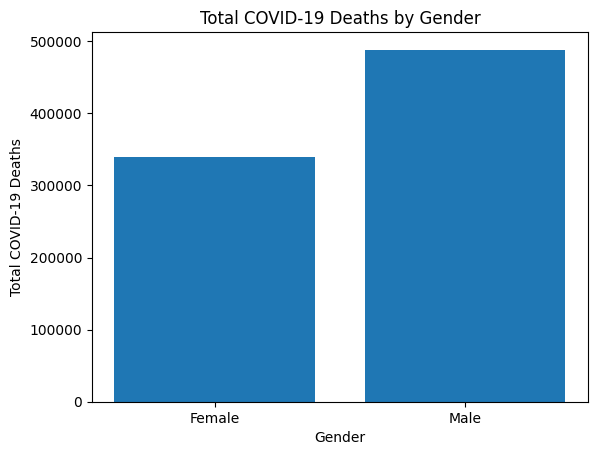

In [82]:
plt.bar(total_gender_deaths['sex'], total_gender_deaths['covid_19_deaths'])
plt.xlabel('Gender')
plt.ylabel('Total COVID-19 Deaths')
plt.title('Total COVID-19 Deaths by Gender')
plt.show()

Based on our statistical analysis, we were able to come to the conclusion that there is a significant statistical difference in the proportion of Covid-19 deaths between Males and Females, however this conclusion was too general and did not fully answer the question we posed at the beginning. From the bar graph given above, we can clearly see that the Male gender has a much higher proportion of deaths from Covid-19. Through the visualization we can also see how much higher the number of deaths is, with the Male gender having almost 150,000 more deaths.

##The next question we want to answer is:

- How Can Age Play A Factor In The Death Rates Of Covid-19 ?

In [83]:
df_pivot = df.pivot_table(index='age_years', columns='sex', values='covid_19_deaths', aggfunc='sum')
df_pivot

sex,Female,Male
age_years,,
0,229,273
1,55,73
2,26,29
3,18,30
4,29,14
...,...,...
80,13046,16872
81,13151,16273
82,13608,16193


This cell above creates a pivot table summarizing the data. We grouped the rows by age_years (as the index) and gender (as the columns), and calculates the total sum of covid_19_deaths for each group. The resulting table shows the breakdown of deaths by age group and sex.

In [84]:
row_to_move = df_pivot.iloc[7]
df_pivot = df_pivot.drop(df_pivot.index[7])

df_pivot = pd.concat([df_pivot.iloc[:1], pd.DataFrame([row_to_move]), df_pivot.iloc[1:]])
df_pivot = df_pivot.iloc[:-2]
df_pivot['Total COVID Deaths'] = df_pivot['Female'] + df_pivot['Male']

Here we are extracting specific rows from the pivot table and reinserting them at different indexes to preserve the data. We then create a new column called 'Total COVID Deaths' that contains the sum of covid deaths for each row between genders.

In [85]:
df_pivot = df_pivot.iloc[2:]
df_pivot.index = df_pivot.index.astype(str).str.replace(' Years', '').str.replace(' Year', '').astype(int)
total_deaths = df_pivot['Total COVID Deaths']

correlation, p_value = stats.pearsonr(df_pivot.index, total_deaths)

print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.91534701547618


Here we extract the indexes and total deaths value from the pivot table to be used for the Pearson Correlation analysis. We performed the Pearson correlation test, which yielded a coefficient of .92. This value provides us with multiple pieces of information regarding the correlation between Age and Covid-19 deaths. A positive value for the correlation coefficient tells us that both features increase and decrease together. In simple terms, this tells us that as Age increases, the number of Covid deaths also increase, and vice versa. The value being close to 1 also tells us that the correlation is very strong, meaning that there is an almost linear relationship between the two metrics.

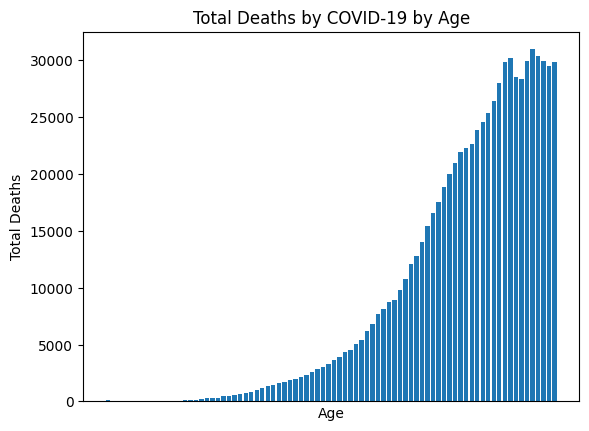

In [86]:
plt.bar(df_pivot.index, df_pivot['Total COVID Deaths'])

plt.xlabel('Age')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by COVID-19 by Age')
plt.xticks([])

plt.show()

Using the pivot table created above,  we create a bar graph to display the trend we see in Covid-19 deaths as age increases.

As we can see from the graph, there is a clear trend when age increases, the total Covid-19 deaths also increase, with the exception of anything under the age of 1. Based on our statistical analysis and visualization, we can reasonably conclude that Age, does in fact, play a factor in the number of Covid-19 deaths. As age increases the likelihood of dying from Covid-19 may increase, yielding higher death counts.

##The next question we pose:

- How Prominent Is The Difference In The Likelihood Of Dying From Covid-19 For Students In College ?

In [87]:
age_21 = df[df['age_years'] == 21]['covid_19_deaths']
age_20 = df[df['age_years'] == 20]['covid_19_deaths']
age_19 = df[df['age_years'] == 19]['covid_19_deaths']
age_18 = df[df['age_years'] == 18]['covid_19_deaths']

Here we are filtering the data for the age groups 18-21 to create a visualization to represent the differences in the total deaths of each age group.

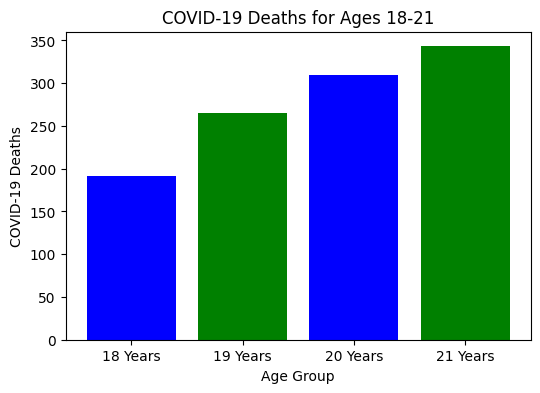

In [88]:
plt.figure(figsize=(6, 4))
plt.bar(['18 Years', '19 Years', '20 Years', '21 Years'], [age_18.sum(), age_19.sum(), age_20.sum(), age_21.sum()], color=['blue', 'green'])

plt.title('COVID-19 Deaths for Ages 18-21')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')

plt.show()

As we see from the graph above, there seems to be a trend in the Covid-19 deaths for students in college. The older the student, the more death counts. At first glance, the graph could show that older college students have more reason to worry about the possibilty of death from Covid-19, however let's perform a statistical analysis to verify this conclusion.

In [89]:
age_group_18 = df[df['age_years'] == 18]['covid_19_deaths']
age_group_19 = df[df['age_years'] == 19]['covid_19_deaths']
age_group_20 = df[df['age_years'] == 20]['covid_19_deaths']
age_group_21 = df[df['age_years'] == 21]['covid_19_deaths']
age_group_22 = df[df['age_years'] == 22]['covid_19_deaths']

Here we separate the Covid-19 deaths by age groups to perform a oneway anova test on all the groups to see if there is a significant difference between the age groups in Covid-19 Death.

In [90]:
anova_result = f_oneway(age_group_18, age_group_19, age_group_20, age_group_21, age_group_22)

Then we perform the anova test.

In [91]:
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA F-statistic: 2.6882166382044406
P-value: 0.1536147911334868


Lastly, we print our results and make our conclusions.

Since our p-value is more than .05, we can reasonably conclude that there is no statistical significant difference in the Covid-19 Deaths between the given age groups. This means that for students of college age, there is no real difference in the likeihood of death due to Covid-19. The result of the F-statistic from the Anova test tells us that the small difference between the group counts likely is a result of random variation, and is not actually a means for concern. This statistical analysis provides more context as to why we see differences in the death counts from different ages in college and why it is not a means of concern.

#**4. Primary Analysis And Visualizations**

In this section, we will be creating and implementing machine learning algorithms to help answer or verify conclusions made from our Exploratory Data Analysis. We start by creating a regression model to help verify the conclusion we came to for our quesion of:

- How Can Age Play A Factor In The Death Rates Of Covid-19 ?

In [92]:
x = df_pivot.index.astype(float)
y = df_pivot['Total COVID Deaths']

First, we must prepare the data for regression. We store the age values in the x variable, and total deaths in the y variable. Total deaths would be our target feature in this case.

In [93]:
degree = 5
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)

Then, we fit a polynomial regression curve of the fifth degree to the data in the graph.

In [94]:
x_fit = np.linspace(min(x), max(x), 100)
y_fit = polynomial(x_fit)

Now we generate y values for the fitted line and smooth x-values for curve.

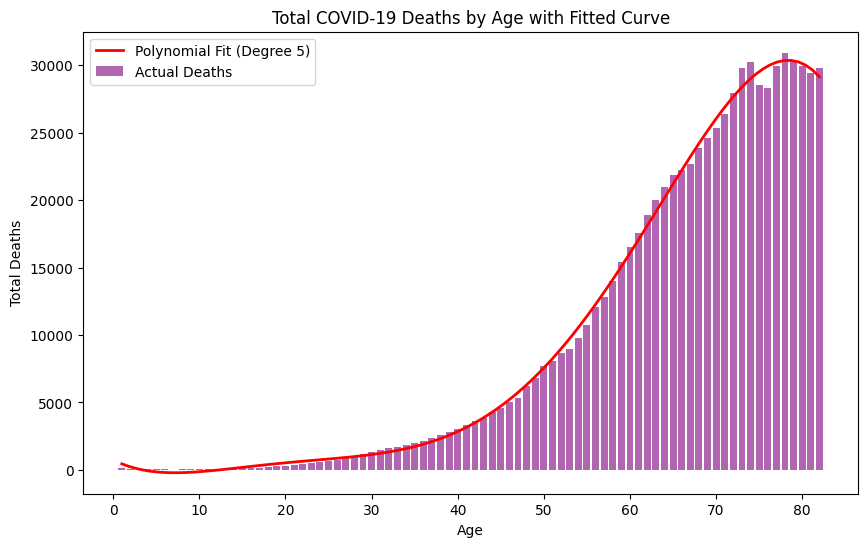

In [95]:
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='purple', alpha=0.6, label='Actual Deaths')
plt.plot(x_fit, y_fit, color='red', linewidth=2, label=f'Polynomial Fit (Degree {degree})')

plt.xlabel('Age')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths by Age with Fitted Curve')
plt.legend()

plt.show()

After plotting our original bar graph, along with the polynomial regression model, we can see that the line follows the trend of the graph very well. This tells us that our regression model for measuring how much age plays a factor in Covid-19 deaths is fairly accurate and should be useful for testing given a random age.

## The next question we want to answer is:

- Given The Amount Of Total Deaths In The United States, How Can We Predict The Number Of Deaths From Covid-19 ?

In [96]:
X = df[['total_deaths']]
y = df['covid_19_deaths']

First we store out input and target features in the x and y variables. For this scenario, the input feature is total deaths, and our target feature or predictor is covid-19 deaths.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then, we split the dataset into a training and test set, 80% training data and 20% test data.

In [98]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Next, we train our Random Forest model and make predictions on our test set.

In [99]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 609805.4445514288
R^2 Score: 0.9785773226775552


After that, we evalute the model using mean squared error and R^2 values.

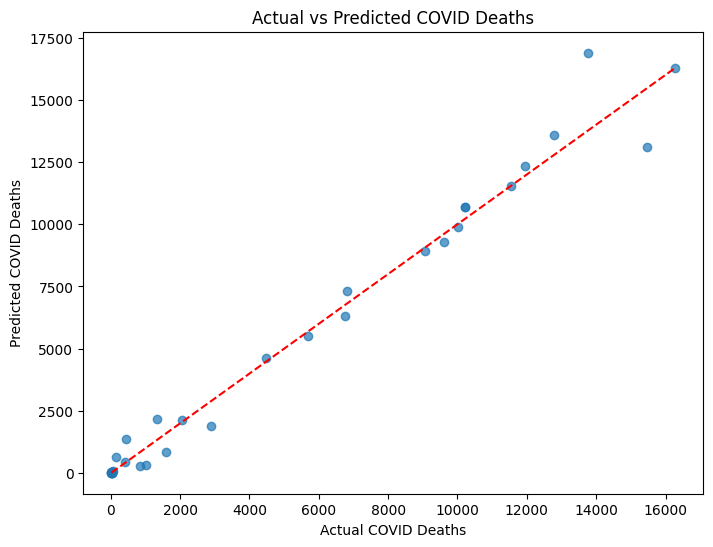

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual COVID Deaths')
plt.ylabel('Predicted COVID Deaths')
plt.title('Actual vs Predicted COVID Deaths')
plt.show()

Lastly, we create a visualization with our predicted values and a line of best fit to see how accurate our model's predictions were. As we can see from the visualization, our line of best fit is well-fitted to test set and there is little deviation. We can further this conclusion by noticing that the R^2 value is extremely close to 1 (.98). This tells us that 98% of the variance in the test set is explained by the model, which is spectacular. This model and conclusion showcase a practical data science application with tangible benefits. The CDC has developed something similar that has helped them understand the growth rate and patterns of Covid-19 deaths so they can be better prepared to deal with global healthcare situations in the future.

## The following Logistic Regression model was developed to verify the results of the question:

- Which Gender Has Experienced More Deaths As A Result Of Covid-19 ?

In [101]:
file_path = '/content/Provisional_COVID-19_Death_Counts_by_Age_in_Years__2020-2023.csv'
df = pd.read_csv(file_path)

Here, we reload our original dataset because we want to avoid conflict with the previous processing completed on the data.

In [102]:
df = df[df['Age Years'] != "85 Years and over"]

def convert_age_to_years(age_str):
    if 'months' in age_str.lower():
        return 0
    elif 'year' in age_str.lower():
        return int(age_str.split()[0])
    else:
        return None

df['age_years'] = df['Age Years'].apply(convert_age_to_years)

df = df.drop(columns=['Age Years', 'Data as of', 'Start Date', 'End Date']).dropna().reset_index(drop=True)

Now, we repeat our data cleaning steps to get our dataset back to it's primed state.

In [103]:
df['sex_binary'] = df['Sex'].apply(lambda x: 1 if x == 'Male' else 0)

Next, we create a binary encoding for male and female gender. In our case we choose 1 if male and 0 if female.

In [104]:
X = df[['sex_binary', 'age_years']]
y = df['COVID-19 Deaths']

Now we store our input and target features into our corresponding variables, similarly to how we did for our polynomial regression model. X contains the binary encoding for gender and the age, Y contains the Covid-19 deaths.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we move into the training and evaluation of the model. First we split the dataset into training and test sets. 80% of the dataset will be the training set and the other 20% will be the test set.

In [106]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

Then, we create and fit the linear regression model.

In [107]:
y_pred = linear_model.predict(X_test)

Then we make predictions using the model and store them in y_pred.

In [108]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

gender_coefficient = linear_model.coef_[0]

Now we evaluate the model using mean squared error and the r-squared value.

In [109]:
print(f"Coefficients: {linear_model.coef_}")
print(f"Intercept: {linear_model.intercept_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (RÂ²): {r2}")

Coefficients: [1826.57229588  209.31464555]
Intercept: -4823.049613821329
Mean Squared Error (MSE): 4381305.065666129
R-squared (RÂ²): 0.8460832294765732


Based on these statistics, we can come to a number of conclusions. The coefficients tell us that for every unit increase in sex, the target feature (Covid deaths) increases by 1827 and for every unit increase in age, Covid deaths increase by 209. Not only does this verify that being male is strongly correlated with covid deaths, but also being older is strongly correlated with covid deaths, further reaffirming our previous conclusions. The R^2 value being close to 1 tells us that our model explains 85% of the variance in the data, suggesting that the model is a strong fit.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


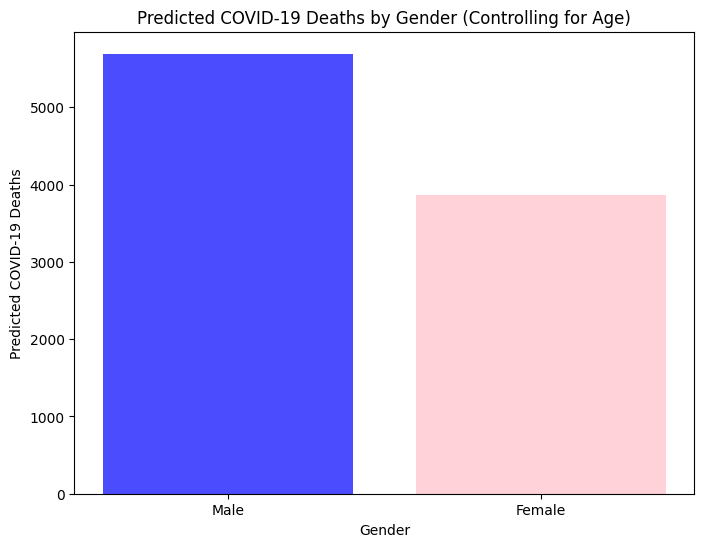

In [110]:
average_age = df['age_years'].mean()
predicted_deaths_male = linear_model.predict([[1, average_age]])[0]
predicted_deaths_female = linear_model.predict([[0, average_age]])[0]

plt.figure(figsize=(8, 6))
genders = ['Male', 'Female']
predicted_deaths = [predicted_deaths_male, predicted_deaths_female]

plt.bar(genders, predicted_deaths, color=['blue', 'pink'], alpha=0.7)
plt.xlabel("Gender")
plt.ylabel("Predicted COVID-19 Deaths")
plt.title("Predicted COVID-19 Deaths by Gender (Controlling for Age)")
plt.show()

For our visualization, we calculated the predicted deaths at the mean age to see the difference when holding age constant. As we can see, our visualization confirms our EDA and model analysis, showing that the number of male deaths at the mean age is greater than the female counterpart.

#**5. Insights And Conclusions**

Our observations and modeling shows insight that age and gender do play roles in COVID-19 mortality rates, with older individuals
and males showing higher susceptibility. Our different statistical and machine learning analyses verified these trends.

Some insights we can take are that these findings emphasize the need for targeted/focused public health interventions to safeguard
vulnerable populations during pandemics. If we cannot safeguard these vulnerable populations then it can at minimum bring attention
and awareness to these populations.

Future work we could involve integrating are additional datasets, such as vaccination coverage, underlying health conditions, and even
more data possibly looking into the 2024 COVID data. This will help us explore more factors influencing mortality. This exploration
would enable the development of more precise predictive models so there can be health strategies to mitigate future health crises.

We hope this tutorial not only provided insights into the driving factors of Covid-19, but also insights into the Data Science Life Cycle.

For more information on the Data Science Life Cycle please visit:

- https://www.geeksforgeeks.org/data-science-lifecycle/